# Pneumonia Detection Model NoteBook

### Importing libraries

In [53]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [54]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

### Load DataSet

In [55]:
train_dataset_dir = '/Users/zainkhan/zain/sideProjects/Pnemounia Detector/chest_xray/train'

In [56]:
test_dataset_dir = '/Users/zainkhan/zain/sideProjects/Pnemounia Detector/chest_xray/test'

In [57]:
# Set the image dimensions
img_width, img_height = 224, 224
# Set batch size
batch_size = 32

### Creating Image Generators

In [58]:
# Create an ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
)

# Create an ImageDataGenerator for validation data
test_datagen = ImageDataGenerator(
    rescale=1./255,
)


In [59]:
# Create generators for training and validation datasets
train_generator = train_datagen.flow_from_directory(
    train_dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


### Display image

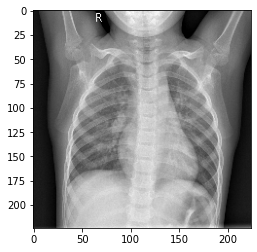

In [60]:
sample_img_path = os.path.join(dataset_dir, 'Normal', 'IM-0115-0001.jpeg')
img = image.load_img(sample_img_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)
plt.imshow(img_array/255.0)  # Rescale pixel values to [0, 1]
plt.show()

In [65]:
# Sample model using MobileNetV2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint

In [66]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', 
                                      monitor='val_accuracy', 
                                      save_best_only=True, 
                                      mode='max', 
                                      verbose=1)

In [68]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    epochs=5,
    callbacks=[checkpoint_callback]
)

Epoch 1/5
163/163 [==============================] - ETA: 0s - loss: 0.1170 - accuracy: 0.9569
Epoch 1: val_accuracy improved from -inf to 0.85855, saving model to best_model.h5
163/163 [==============================] - 472s 3s/step - loss: 0.1170 - accuracy: 0.9569 - val_loss: 1.2007 - val_accuracy: 0.8586
Epoch 2/5
163/163 [==============================] - ETA: 0s - loss: 0.0531 - accuracy: 0.9824
Epoch 2: val_accuracy did not improve from 0.85855
163/163 [==============================] - 691s 4s/step - loss: 0.0531 - accuracy: 0.9824 - val_loss: 1.9161 - val_accuracy: 0.7928
Epoch 3/5
163/163 [==============================] - ETA: 0s - loss: 0.0606 - accuracy: 0.9806
Epoch 3: val_accuracy did not improve from 0.85855
163/163 [==============================] - 449s 3s/step - loss: 0.0606 - accuracy: 0.9806 - val_loss: 4.2574 - val_accuracy: 0.6513
Epoch 4/5
163/163 [==============================] - ETA: 0s - loss: 0.0469 - accuracy: 0.9849
Epoch 4: val_accuracy did not improve f

In [69]:
# Evaluate the model
score = model.evaluate(validation_generator, verbose=0)
print("Validation Accuracy:", score[1])

Validation Accuracy: 0.5913461446762085


In [34]:
from tensorflow.keras.models import load_model
model.save('84PercentPneumoniaDetector.h5')